In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from model import GeneticAlgorithm

torch.random.manual_seed(0)

# Advertising Data - GA for Regression

In [2]:
ad_data_df = pd.read_csv("data/advertising.csv")
ad_data_df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# convert to tensor
ad_data = torch.tensor(ad_data_df.values, dtype=torch.float32)
# devide features to X, label to y 
X, y = ad_data[:, :-1], ad_data[:, -1]
print(X.shape)
print(y.shape)

torch.Size([200, 3])
torch.Size([200])


In [4]:
# add bias to X
bias = torch.ones((X.shape[0], 1))
X_b = torch.cat((bias, X), dim=1)
print(X_b.shape)

torch.Size([200, 4])


In [5]:
def compute_loss_regression(individual, X, y):
    y_hat = X @ individual
    return torch.mean((y - y_hat) ** 2)

In [6]:
GAModel = GeneticAlgorithm(X_b, y, individual_size=X_b.shape[1], population_size=600, fitness_function=compute_loss_regression, bounds=10, mutation_rate=0.05, crossover_rate=0.9, elitism=2)
history = GAModel.fit(200)
best_population = GAModel.get_best_individual()
best_population

Generation:  10 Best fitness:  tensor([-2.9661,  0.0860, -0.0372,  0.2053]) with fitness:  tensor(0.0352)
Generation:  20 Best fitness:  tensor([ 0.7335,  0.0860, -0.0372,  0.0368]) with fitness:  tensor(0.0631)
Generation:  30 Best fitness:  tensor([1.0507, 0.0817, 0.0211, 0.0368]) with fitness:  tensor(0.1023)
Generation:  40 Best fitness:  tensor([1.0507, 0.0817, 0.0696, 0.0368]) with fitness:  tensor(0.1073)
Generation:  50 Best fitness:  tensor([-0.0635,  0.0817,  0.0848,  0.0368]) with fitness:  tensor(0.1131)
Generation:  60 Best fitness:  tensor([1.2657, 0.0732, 0.0848, 0.0368]) with fitness:  tensor(0.1687)
Generation:  70 Best fitness:  tensor([1.2657, 0.0713, 0.0848, 0.0368]) with fitness:  tensor(0.1819)
Generation:  80 Best fitness:  tensor([2.0966, 0.0713, 0.0848, 0.0152]) with fitness:  tensor(0.2025)
Generation:  90 Best fitness:  tensor([2.1219, 0.0713, 0.0848, 0.0152]) with fitness:  tensor(0.2027)
Generation:  100 Best fitness:  tensor([2.2245, 0.0713, 0.0848, 0.0152

tensor([3.2674, 0.0652, 0.0892, 0.0066])

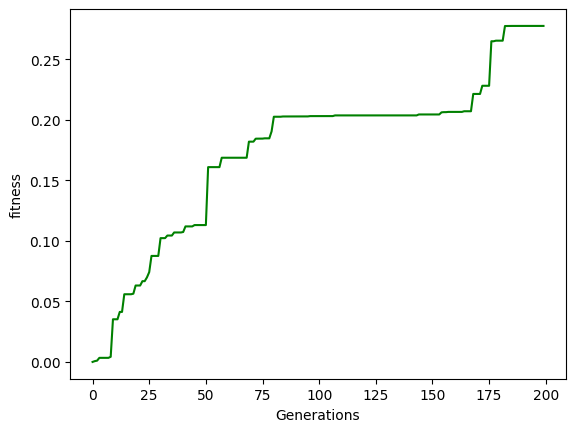

In [7]:
plt.plot(history, c='green')
plt.xlabel('Generations')
plt.ylabel('fitness')
plt.show()

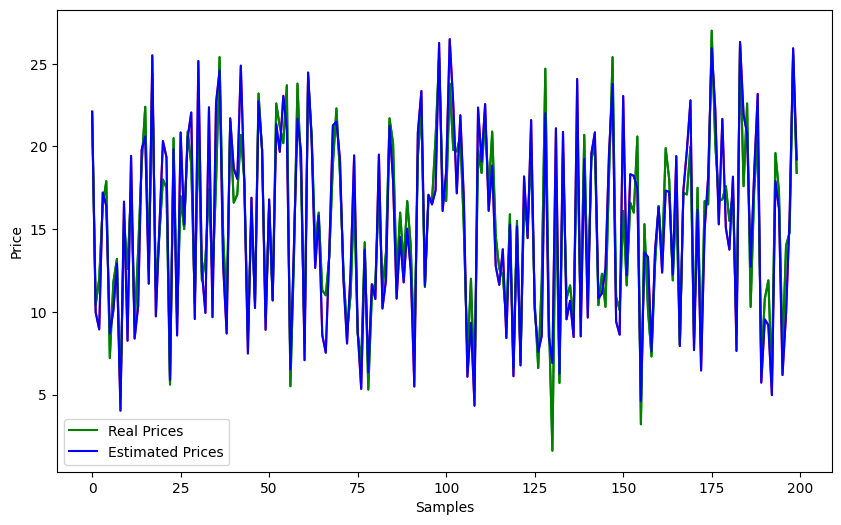

In [8]:
estimated_prices = []

for feature in X_b:        
    estimated_price = sum(c*x for x, c in zip(feature, best_population))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

# Advertising Data - GA for Classification


In [9]:
iris = datasets.load_iris()
X = torch.tensor(iris.data[:100], dtype=torch.float32)
y = torch.tensor(iris.target[:100], dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([100, 4])
torch.Size([100])


In [10]:
# add bias to X
bias = torch.ones((X.shape[0], 1))
X_b = torch.cat((bias, X), dim=1)
print(X_b.shape)

torch.Size([100, 5])


In [11]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def compute_loss_classification(individual, X, y):
    y_hat = sigmoid(X @ individual)
    y_hat = torch.clip(y_hat, 1e-7, 1 - 1e-7)
    return torch.mean( y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat) )
    

In [12]:
GAModel = GeneticAlgorithm(X_b, y, individual_size=X_b.shape[1], population_size=500, fitness_function=compute_loss_classification, bounds=20, mutation_rate=0.1, crossover_rate=0.9, elitism=2)
history = GAModel.fit(1000)
best_population = GAModel.get_best_individual()
best_population


Generation:  10 Best fitness:  tensor([-2.9081, -3.5190, -3.8663,  7.7459,  9.4986]) with fitness:  tensor(5467.3818)
Generation:  20 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  30 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  40 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  50 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  60 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  70 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  80 Best fitness:  tensor([ 7.2345, -3.5190, -3.8663,  8.5975,  9.4986]) with fitness:  tensor(137480.7500)
Generation:  90 Best fitness:  tensor([ 7.

tensor([ 7.2400, -3.5190, -3.8663,  8.5975,  9.5037])

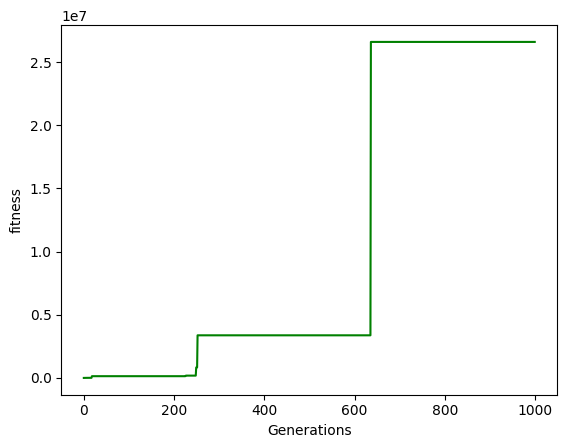

In [13]:
plt.plot(history, c='green')
plt.xlabel('Generations')
plt.ylabel('fitness')
plt.show()

In [14]:

preds = sigmoid(X_b @ best_population)
preds = torch.round(preds)
print(preds)
print(y)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


<function matplotlib.pyplot.show(close=None, block=None)>

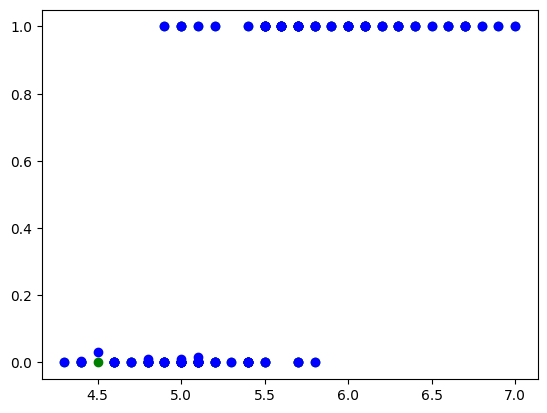

In [15]:
estimated_prices = []

for feature in X_b:        
    estimated_price = sigmoid(sum(c*x for x, c in zip(feature, best_population)))
    estimated_prices.append(estimated_price)
         
plt.scatter(X_b[:,1], y, c='green', label='Real Prices')
plt.scatter(X_b[:,1], estimated_prices, c='blue', label='Estimated Prices')
plt.show